<a href="https://colab.research.google.com/github/soma2000-lang/Cultural-fit/blob/main/Cultural_fit_between_employee_and_the_comapany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
plc=pd.read_csv("/content/Placement_Data_Full_Class.csv")

In [10]:
plc.sample(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
22,23,F,69.8,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
138,139,F,82.0,Others,64.00,Others,Science,73.00,Sci&Tech,Yes,96.00,Mkt&Fin,71.77,Placed,250000.0
51,52,M,54.4,Central,61.12,Central,Commerce,56.20,Comm&Mgmt,No,67.00,Mkt&HR,62.65,Not Placed,NaN
12,13,F,47.0,Central,55.00,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
152,153,F,75.4,Others,60.50,Central,Science,84.00,Sci&Tech,No,98.00,Mkt&Fin,65.25,Placed,240000.0
115,116,F,73.0,Others,63.00,Others,Science,66.00,Comm&Mgmt,No,89.00,Mkt&Fin,60.50,Placed,216000.0
172,173,M,73.0,Others,58.00,Others,Commerce,56.00,Comm&Mgmt,No,84.00,Mkt&HR,52.64,Placed,300000.0
119,120,M,60.8,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
69,70,M,73.0,Central,73.00,Central,Science,66.00,Sci&Tech,Yes,70.00,Mkt&Fin,68.07,Placed,275000.0
198,199,F,67.0,Central,70.00,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN


In [11]:
plc.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [38]:
plc.shape

(215, 12)

In [12]:
plc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [13]:
plc.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [14]:

plc.describe(include='all')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


In [15]:
plc.isnull() 
#

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



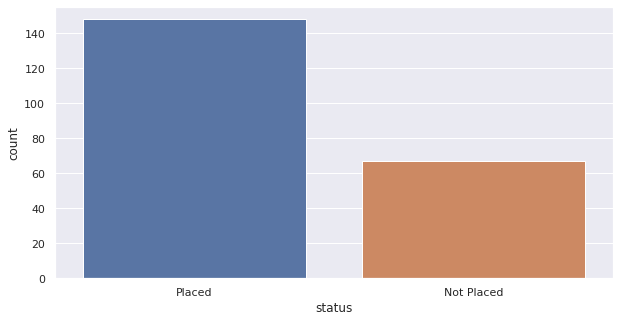

In [16]:
   #f,ax=plt.subplots(2,2,figsize=(15,10))
plt.figure(figsize=(10,5))
sns.countplot(plc['status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



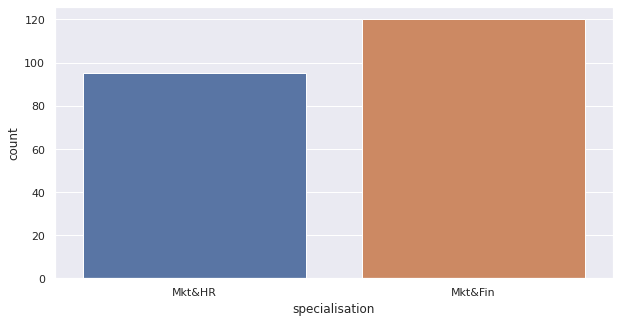

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(plc['specialisation'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



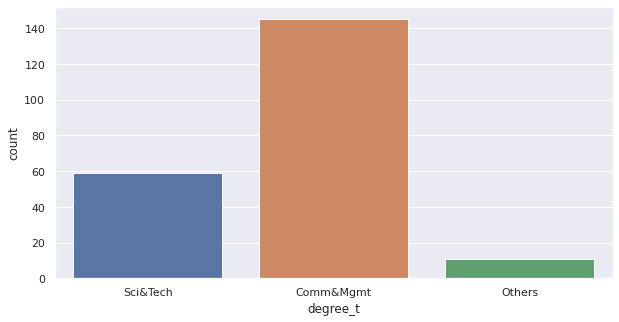

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(plc['degree_t'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



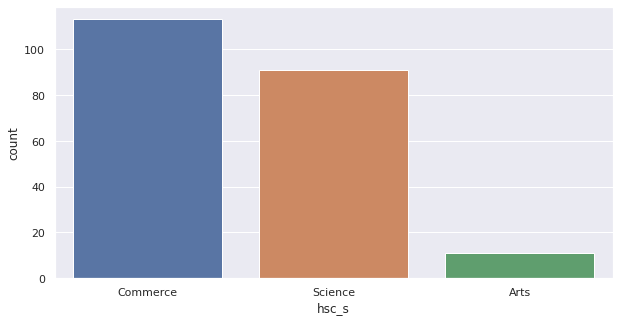

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(plc['hsc_s'])

In [20]:
df2=plc[plc.status=='Placed']
df3=plc[plc.status=='Not Placed']

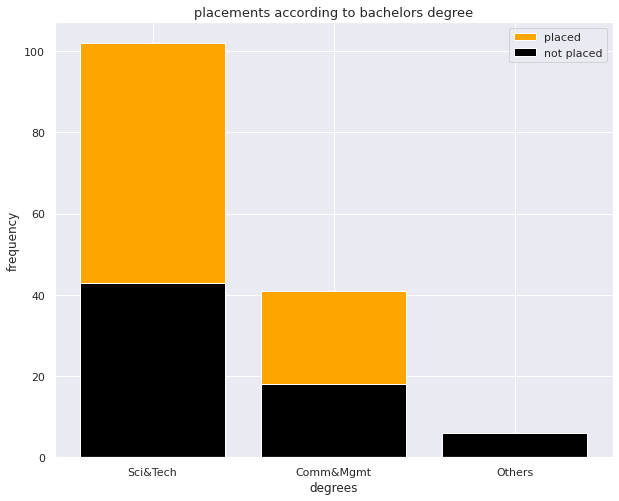

In [21]:
plt.figure(figsize=(10,8))
plt.bar(df2['degree_t'].unique(),height=df2['degree_t'].value_counts(),color='orange',label='placed')
plt.bar(df3['degree_t'].unique(),height=df3['degree_t'].value_counts(),color='black',label='not placed')

plt.xlabel('degrees')
plt.ylabel('frequency')
plt.title('placements according to bachelors degree',fontsize=13)
plt.legend()

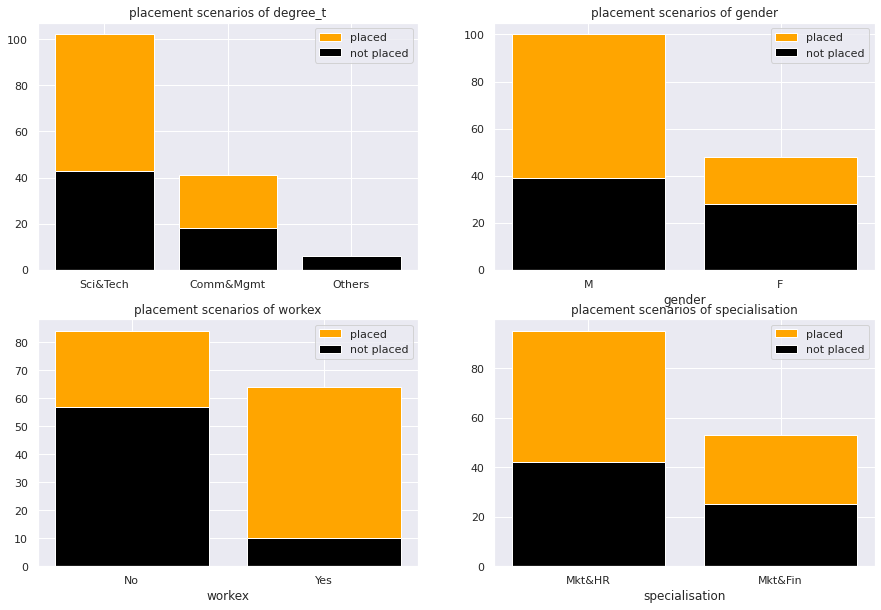

In [22]:
f, ax=plt.subplots(2,2,figsize=(15,10))

ax[0,0].bar(df2['degree_t'].unique(),height=df2['degree_t'].value_counts(),color='orange',label='placed')
ax[0,0].bar(df3['degree_t'].unique(),height=df3['degree_t'].value_counts(),color='black',label='not placed')
ax[0,0].set_title('placement scenarios of degree_t')
ax[0,0].legend()
ax[0,1].bar(df2['gender'].unique(),height=df2['gender'].value_counts(),color='orange',label='placed')
ax[0,1].bar(df3['gender'].unique(),height=df3['gender'].value_counts(),color='black',label='not placed')
ax[0,1].set_xlabel('gender')
ax[0,1].set_title('placement scenarios of gender')
ax[0,1].legend()
ax[1,0].bar(df2['workex'].unique(),height=df2['workex'].value_counts(),color='orange',label='placed')
ax[1,0].bar(df3['workex'].unique(),height=df3['workex'].value_counts(),color='black',label='not placed')
ax[1,0].set_xlabel('workex')
ax[1,0].set_title('placement scenarios of workex')
ax[1,0].legend()
ax[1,1].bar(df2['specialisation'].unique(),height=df2['specialisation'].value_counts(),color='orange',label='placed')
ax[1,1].bar(df3['specialisation'].unique(),height=df3['specialisation'].value_counts(),color='black',label='not placed')
ax[1,1].set_xlabel('specialisation')
ax[1,1].set_title('placement scenarios of specialisation')
plt.legend()

In [23]:
def change(data):
    if data<40.00:
        return 1
    elif data>=40.00 and data<50.00:
        return 2
    elif data>=50.00 and data<65.00:
        return 3
    elif data>=65.00 and data<80.00:
        return 4
    else:
        return 5

In [24]:
plc['10_percent']=plc.ssc_p.apply(change)
plc['12_percent']=plc.hsc_p.apply(change)
plc['degree_percent']=plc.degree_p.apply(change)
plc['etest_percent']=plc.etest_p.apply(change)
plc['mba_percent']=plc.mba_p.apply(change)

Regression tasks


In [25]:


#for regression task use r2_score in place of accuracy_score
hms

def algorithm1(X,y):
    model=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score is : {}".format(acc_score))
    
    
def algorithm2(X,y,n):
    model=KNeighborsClassifier(n_neighbors=n)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc_score=accuracy_score(pred,y_test)
    #print("accuracy score is : {}".format(acc_score))
    return acc_score
    
def algorithm4(X,y):
    model=RandomForestClassifier()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score is : {}".format(acc_score))


In [26]:
from sklearn.preprocessing import LabelEncoder

s=plc.dtypes=='object'
object_cols=list(s[s].index)
print(object_cols)

encoder=LabelEncoder()
for cols in object_cols:
    plc[cols]=encoder.fit_transform(plc[cols])

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [27]:
plc.drop(['ssc_p','hsc_p','hsc_p','degree_p','mba_p',],axis=1,inplace=True)

In [28]:
plc.set_index('sl_no',inplace=True)
plc.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,salary,10_percent,12_percent,degree_percent,etest_percent,mba_percent
sl_no,,,,,,,,,,,,,,,
1,1,1,1,1,2,0,55.0,1,1,270000.0,3,5,2,2,2
2,1,0,1,2,2,1,86.5,0,1,200000.0,4,4,4,5,3
3,1,0,0,0,0,0,75.0,0,1,250000.0,3,3,3,4,2
4,1,0,0,2,2,0,66.0,1,0,NaN,2,2,2,3,2
5,1,0,0,1,0,0,96.8,0,1,425000.0,5,4,4,5,2


In [43]:
X = plc['gender',  'ssc_b',  'hsc_b', 'hsc_s', 'degree_t', 'workex', 'etest_p', 'specialisation']
y = plc['status']

KeyError: ignored

NameError: ignored